In [1]:
import cv2 as cv
import numpy as np
from salient_validator import SalientValidator
from heatmap_extractor import HeatmapCenterExtractor

In [2]:
def load_videos(path: str) -> tuple:

    screen_frames = [f'{path}/screen/{frame}' 
                        for frame in os.listdir(f'{path}/screen') 
                            if frame != '.DS_Store']
    
    hm_frames = [f'{path}/heatmap/{frame}' 
                    for frame in os.listdir(f'{path}/heatmap') 
                        if frame != '.DS_Store']

    sal_frames = [f'{path}/sal/{frame}' 
                    for frame in os.listdir(f'{path}/sal') 
                        if frame != '.DS_Store']

    return screen_frames, hm_frames, sal_frames

In [3]:
hce = HeatmapCenterExtractor()

In [4]:
image = '0374'

In [5]:
screen_test = cv.imread(f'../data/Video/E11/screen/{image}.png')
heatmap_test = cv.imread(f'../data/Video/E11/heatmap/{image}.png')
sal_test = cv.imread(f'../data/Video/E11/sal/{image}.jpeg', cv.IMREAD_GRAYSCALE)

In [6]:
import matplotlib.pyplot as plt

In [7]:
def get_heatmap_mask(screen: np.array, heatmap: np.array):

    diff = cv.absdiff(cv.cvtColor(screen, cv.COLOR_BGR2GRAY),
                    cv.cvtColor(heatmap, cv.COLOR_BGR2GRAY))

    _, bi = cv.threshold(diff,10,255,0)

    contour = hce.get_salience_contour(bi)
    if contour is not None:
        contour = contour.contour
    else:
        return None
    #create a mask of 0 with the area indise the contour as 1
    mask = np.zeros(screen.shape[:2], dtype=np.uint8)
    cv.drawContours(mask, [contour], -1, color=(255, 255, 255), thickness=cv.FILLED)
    return mask

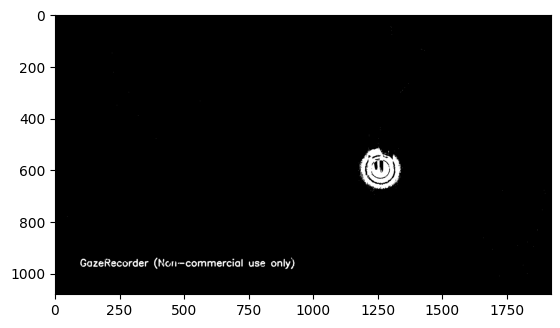

In [8]:
diff = cv.absdiff(cv.cvtColor(screen_test, cv.COLOR_BGR2GRAY),
                    cv.cvtColor(heatmap_test, cv.COLOR_BGR2GRAY))

_, bi = cv.threshold(diff,15,255,0)

plt.imshow(bi, cmap='gray')

(array([[[1790, 1079]]], dtype=int32), array([[[1784, 1079]],

       [[1785, 1079]]], dtype=int32), array([[[1662, 1079]]], dtype=int32), array([[[1462, 1079]]], dtype=int32), array([[[1456, 1079]]], dtype=int32), array([[[1379, 1079]]], dtype=int32), array([[[1748, 1078]]], dtype=int32), array([[[1785, 1077]]], dtype=int32), array([[[1458, 1077]]], dtype=int32), array([[[1733, 1076]]], dtype=int32), array([[[1730, 1075]]], dtype=int32), array([[[1379, 1075]]], dtype=int32), array([[[1426, 1073]]], dtype=int32), array([[[1383, 1073]],

       [[1382, 1074]],

       [[1382, 1075]],

       [[1383, 1074]],

       [[1384, 1073]]], dtype=int32), array([[[1804, 1072]]], dtype=int32), array([[[ 214, 1072]]], dtype=int32), array([[[1469, 1071]],

       [[1468, 1072]]], dtype=int32), array([[[1806, 1070]]], dtype=int32), array([[[1468, 1069]]], dtype=int32), array([[[1432, 1069]]], dtype=int32), array([[[1324, 1068]]], dtype=int32), array([[[1719, 1067]]], dtype=int32), array([[[1457, 1066

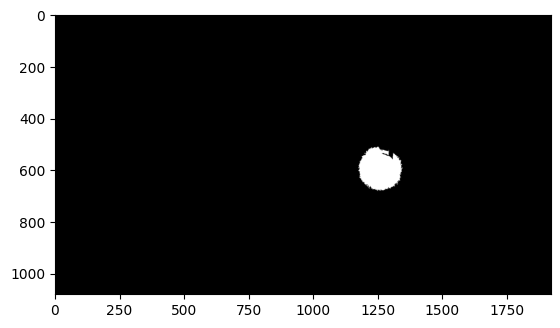

In [9]:
mask = get_heatmap_mask(screen_test, heatmap_test)
print(mask)
plt.imshow(mask, cmap='gray')

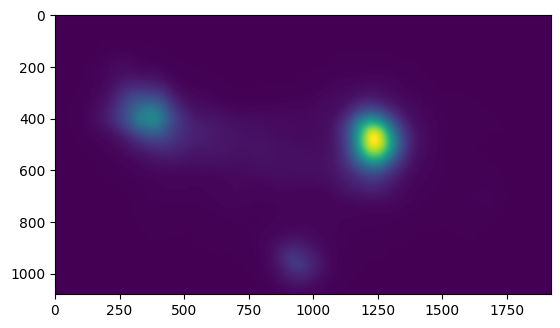

In [10]:
plt.imshow(sal_test, cmap='gray')

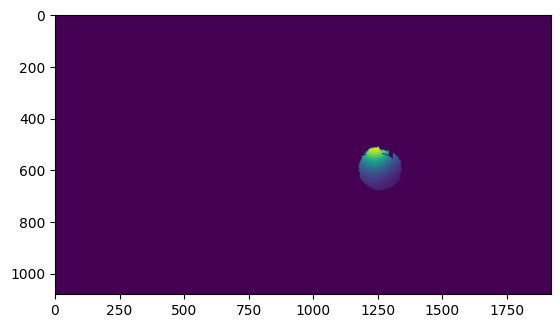

In [11]:
salience = cv.bitwise_and(sal_test, sal_test, mask=mask)

plt.imshow(salience)

In [12]:
print(mask)
print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



In [13]:
print(np.sum(salience))

1581657


In [14]:
np.count_nonzero(salience)

20709

In [15]:
mask_size = np.count_nonzero(mask == 255)
sal_sum = np.sum(salience)

print(sal_sum / mask_size)

76.37534405331016
